In [1]:
from azureml.core.authentication import AzureCliAuthentication
import requests
import os
from azureml.core import Workspace, Experiment, ScriptRunConfig
from azureml.core.compute import AmlCompute, ComputeTarget
from azureml.core.conda_dependencies import CondaDependencies
from azureml.core.runconfig import RunConfiguration

In [2]:
os.environ["AZUREML_CURRENT_CLOUD"] = "AzureStack-Admin-cae20689-f5ee-4377-93ba-18a68ebb55d4"
os.environ["ARM_CLOUD_METADATA_URL"] = "https://aml.dbadapter.shanghai.int.azurestack.corp.microsoft.com/CloudEndpoints"
os.environ["HTTPS_PROXY"] = "http://127.0.0.1:8888"
os.environ["HTTP_PROXY"] = "http://127.0.0.1:8888"
os.environ["NO_PROXY"] = "kubernetes.docker.internal:6443"

proxy_url = 'http://localhost:30000' 
ae3p_url = 'http://localhost:31000' 
os.environ['AZUREML_SERVICE_ENDPOINT'] = proxy_url
os.environ["AZUREML_DEV_URL_PIPELINES"] = ae3p_url

In [3]:
!az cloud set -n AzureStack-Admin-cae20689-f5ee-4377-93ba-18a68ebb55d4

In [4]:
cli_auth = AzureCliAuthentication()
Onebox_Workspace = Workspace(subscription_id='ec8a03cd-95c8-4e27-8298-baafeac190cd',
                resource_group='jiadu-amltestrg',
                workspace_name='jd-e2ews-220331a',
                auth=cli_auth)

In [5]:
COMPUTE_NAME = 'amlarc-asz3'
ws = Onebox_Workspace
data_folder = "/nfs_share"+"/mnist" # training data are saved to <mountPoint>/mnist (have to use / as the path separator)

run_config = RunConfiguration()
run_config.environment.docker.enabled = True
run_config.environment.python.user_managed_dependencies = False
# run_config.environment.python.conda_dependencies = CondaDependencies.create(pip_packages=['azureml-sdk==1.10.0', 'azureml-dataprep[fuse,pandas]==1.10.1'])
# run_config.environment.python.conda_dependencies.set_pip_option('--index-url https://azuremlsdktestpypi.azureedge.net/sdk-release/master/588E708E0DF342C4A80BD954289657CF')
# run_config.environment.python.conda_dependencies.set_pip_option('--extra-index-url https://pypi.python.org/simple')
# run_config.environment.python.conda_dependencies.set_pip_option('--pre')
run_config.environment.python.conda_dependencies = CondaDependencies.create(pip_packages=['azureml-dataset-runtime[pandas,fuse]', 'azureml-defaults'], conda_packages = ['scikit-learn==0.22.1'])
run_config.target = COMPUTE_NAME

args = ['--data-folder', data_folder, '--regularization', 0.5]
script_folder = 'mnist_script'
src = ScriptRunConfig(
    source_directory=script_folder,
    script='train.py',
    arguments=args,
    run_config=run_config
)
experiment_name = "mnist-demo-on-AMLOneBox"
exp = Experiment(workspace=ws, name=experiment_name)
run = exp.submit(config=src)
run.wait_for_completion(show_output=True)

'enabled' is deprecated. Please use the azureml.core.runconfig.DockerConfiguration object with the 'use_docker' param instead.


RunId: mnist-demo-on-AMLOneBox_1648730634_fe678a0e
Web View: https://ml.azure.com/runs/mnist-demo-on-AMLOneBox_1648730634_fe678a0e?wsid=/subscriptions/ec8a03cd-95c8-4e27-8298-baafeac190cd/resourcegroups/jiadu-amltestrg/workspaces/jd-e2ews-220331a&tid=c157313f-ec36-46f2-ac00-d17e0d28b1cd



Streaming azureml-logs/55_azureml-execution-tvmps_d39ef8ae0967a84478e4a6e07debd317-master-0_d.txt




Streaming azureml-logs/70_driver_log.txt




Streaming azureml-logs/75_job_post-tvmps_d39ef8ae0967a84478e4a6e07debd317-master-0_d.txt

[2022-03-31T12:48:33.096275] Entering job release
Cannot provide tracer without any exporter configured.
[2022-03-31T12:48:34.095388] Starting job release
[2022-03-31T12:48:34.095778] Logging experiment finalizing status in history service.
[2022-03-31T12:48:34.095953] job release stage : upload_datastore starting...
Starting the daemon thread to refresh tokens in background for process with pid = 692
[2022-03-31T12:48:34.096191] job release stage : start importing azureml.history._tracking in run_history_release.
[2022-03-31T12:48:34.096601] job release stage : copy_batchai_cached_logs starting...
[2022-03-31T12:48:34.096914] job release stage : execute_job_release starting...
[2022-03-31T12:48:34.097350] Entering context manager injector.
[2022-03-31T12:48:34.097404] job release stage : copy_batchai_cached_logs completed...
Cannot provide tracer without any exporter configured.
[2022-03-31T12:4


Execution Summary
RunId: mnist-demo-on-AMLOneBox_1648730634_fe678a0e
Web View: https://ml.azure.com/runs/mnist-demo-on-AMLOneBox_1648730634_fe678a0e?wsid=/subscriptions/ec8a03cd-95c8-4e27-8298-baafeac190cd/resourcegroups/jiadu-amltestrg/workspaces/jd-e2ews-220331a&tid=c157313f-ec36-46f2-ac00-d17e0d28b1cd



{'runId': 'mnist-demo-on-AMLOneBox_1648730634_fe678a0e',
 'target': 'amlarc-asz3',
 'status': 'Completed',
 'startTimeUtc': '2022-03-31T12:45:39.062798Z',
 'endTimeUtc': '2022-03-31T12:48:57.303298Z',
 'services': {},
 'properties': {'_azureml.ComputeTargetType': 'kubernetes',
  'ContentSnapshotId': 'c908ddaf-2737-40d8-982b-bb64006b0205',
  'azureml.git.repository_uri': 'https://github.com/msftcoderdjw/AML-Kubernetes.git',
  'mlflow.source.git.repoURL': 'https://github.com/msftcoderdjw/AML-Kubernetes.git',
  'azureml.git.branch': 'jiadu/onprem',
  'mlflow.source.git.branch': 'jiadu/onprem',
  'azureml.git.commit': '3075852834288cb487fe85f8d4821864034a05a2',
  'mlflow.source.git.commit': '3075852834288cb487fe85f8d4821864034a05a2',
  'azureml.git.dirty': 'False',
  'ProcessInfoFile': 'azureml-logs/process_info.json',
  'ProcessStatusFile': 'azureml-logs/process_status.json',
  'JobType': 'RegularJob',
  'GpuCount': '0',
  'Cluster': 'jiadu-ashk8s'},
 'inputDatasets': [],
 'outputDatasets

In [6]:
run.get_all_logs()

['f:\\Vienna\\AML-Kubernetes\\docs\\AKS-HCI\\notebooks\\mnist-sdkv1\\mnist_script\\assets\\mnist-demo-on-AMLOneBox_1648730634_fe678a0e\\azureml-logs/55_azureml-execution-tvmps_d39ef8ae0967a84478e4a6e07debd317-master-0_d.txt',
 'f:\\Vienna\\AML-Kubernetes\\docs\\AKS-HCI\\notebooks\\mnist-sdkv1\\mnist_script\\assets\\mnist-demo-on-AMLOneBox_1648730634_fe678a0e\\azureml-logs/65_job_prep-tvmps_d39ef8ae0967a84478e4a6e07debd317-master-0_d.txt',
 'f:\\Vienna\\AML-Kubernetes\\docs\\AKS-HCI\\notebooks\\mnist-sdkv1\\mnist_script\\assets\\mnist-demo-on-AMLOneBox_1648730634_fe678a0e\\azureml-logs/70_driver_log.txt',
 'f:\\Vienna\\AML-Kubernetes\\docs\\AKS-HCI\\notebooks\\mnist-sdkv1\\mnist_script\\assets\\mnist-demo-on-AMLOneBox_1648730634_fe678a0e\\azureml-logs/75_job_post-tvmps_d39ef8ae0967a84478e4a6e07debd317-master-0_d.txt',
 'f:\\Vienna\\AML-Kubernetes\\docs\\AKS-HCI\\notebooks\\mnist-sdkv1\\mnist_script\\assets\\mnist-demo-on-AMLOneBox_1648730634_fe678a0e\\azureml-logs/azureml/job_log_agent.

In [7]:
import os
from pathlib import Path
prefix = Path(os.getcwd())
model_dir = str(prefix.joinpath("model"))
os.makedirs(model_dir, exist_ok=True)

run.download_file('outputs/sklearn_mnist_model.pkl', model_dir + os.path.sep + 'sklearn_mnist_model.pkl')

## Test trained model
### Test with inputs

Here you may use the image from test asset. The first 30 images and its labels are shown below.

### Download test images (optional, do it once)

In [8]:
from azureml.core import Dataset
from azureml.opendatasets import MNIST
import os

def download_mnist_data():
    data_folder = os.path.join(os.getcwd(), 'mnist_data')
    os.makedirs(data_folder, exist_ok=True)

    mnist_file_dataset = MNIST.get_file_dataset()
    path = mnist_file_dataset.download(data_folder, overwrite=True)
    downloaded_folder = os.path.dirname(path[0])
    print("downloaded to", downloaded_folder)
    
    return downloaded_folder

downloaded_folder = download_mnist_data()
downloaded_folder


downloaded to f:\Vienna\AML-Kubernetes\docs\AKS-HCI\notebooks\mnist-sdkv1\mnist_data\https%3A\%2Fazureopendatastorage.azurefd.net\mnist


'f:\\Vienna\\AML-Kubernetes\\docs\\AKS-HCI\\notebooks\\mnist-sdkv1\\mnist_data\\https%3A\\%2Fazureopendatastorage.azurefd.net\\mnist'

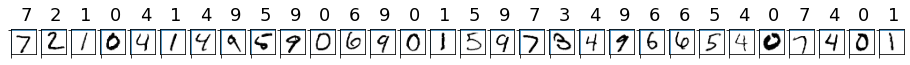

In [9]:
from mnist_script.utils import load_data
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

data_folder = os.path.join(os.getcwd(), 'mnist_data')

X_test = load_data(glob.glob(os.path.join(data_folder,"**/t10k-images-idx3-ubyte.gz"), recursive=True)[0], False) / 255.0
y_test = load_data(glob.glob(os.path.join(data_folder,"**/t10k-labels-idx1-ubyte.gz"), recursive=True)[0], True).reshape(-1)

# show first 30 figures

count = 0
sample_size = 30
plt.figure(figsize = (16, 6))
# for i in np.random.permutation(X_test.shape[0])[:sample_size]:
for i in range(30):
    count = count + 1
    plt.subplot(1, sample_size, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x = 10, y = -10, s = y_test[i], fontsize = 18)
    plt.imshow(X_test[i].reshape(28, 28), cmap = plt.cm.Greys)
plt.show()

Test the second image: 2

In [10]:
import json
score_uri = "http://localhost:12345/predict"

import requests
# second number should be 7,2
test = json.dumps({"data": X_test.tolist()[:2]})
headers = {'Content-Type': 'application/json'}
r = requests.post(score_uri, data=test, headers=headers)
print(f"predictions: {r.json()}")

predictions: [7, 2]
